In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from framework_pkg.framework import FrameWork
from framework_pkg.survival_probablity import MSW

plt.rcParams['text.usetex']=True
plt.style.use('classic')

param ={'SinT12'  : 0.308 ,
        'T13'  : 8.57, 
        'mu1'  : 0.,
        'mu2'  : 0., 
        'mu3'  : 0.  ,
        'mdm'  : 5e-2 , 
        'alpha': 0.  ,
        'eps' : 0.  ,
        'alpha_eps' : 0.  ,
        'M12'  : 6.9e-5 }


frame_predicted_total_signal  = FrameWork(threshold=4.5,
                                        efficiency_correction=True,
                                        resolution_correction=False,
                                    )

msw_signal_fraction = frame_predicted_total_signal.__getitem__(param) 

#p_msw = np.mean(frame_predicted_total_signal.p_msw,axis=0)

data = np.loadtxt('./Data/modulation_data.txt')
annual_data = np.array(pd.read_csv('./Data/plot-data.csv'))

In [ ]:
def PULDM(t, t_p, mu_tilde, m, alpha, eps, alpha_eps):
    theta_p = 2 * np.pi * (t - t_p)
    puldm = (1 - eps**2 * np.cos(theta_p - alpha_eps)**2) * np.sin(m * t * 1.31e20 * 365.25  + alpha)**2 
    return puldm[:,np.newaxis] * mu_tilde**2


def PULDM_exact(t, t_p, mu_tilde, m, alpha, eps, alpha_eps):
    theta_p = 2 * np.pi * (t - t_p)
    puldm = np.sqrt(1 - eps**2 * np.cos(theta_p - alpha_eps)**2) * np.sin(m * t * 1.31e20 * 365.25  + alpha)
    return 1 - np.cos(puldm[:,np.newaxis] * mu_tilde)**2 


t = frame_predicted_total_signal.time_weights

I_evolved, mass_weights = MSW(param, frame_predicted_total_signal.energy_nu)

mean_I_evolved = np.zeros(((t.shape[0], mass_weights.shape[0], 3)))
for i in range(3):
    #mean_I_evolved[:,:,i] = (t[:,np.newaxis,2] * I_evolved[np.newaxis,:,i,0] + t[:,np.newaxis,3] * I_evolved[np.newaxis,:,i,1]) / (t[:,np.newaxis,2] + t[:,np.newaxis,3] )
    mean_I_evolved[:,:,i] = I_evolved[np.newaxis,:,i,0]

p_msw = np.sum(mean_I_evolved * mass_weights, axis=2)


m = 1e-23
alpha = 0
eps = 1
alpha_eps = np.pi/2
t_p = - 257 / 365.25
mu_tilde = np.array([0.5, 0.5, 0])

p_uldm = PULDM(t[:,1]/365.25, t_p, mu_tilde, m, alpha, eps, alpha_eps)
p_uldm_exact = PULDM_exact(t[:,1]/365.25, t_p, mu_tilde, m, alpha, eps, alpha_eps)



p_ee = np.zeros((t.shape[0], mass_weights.shape[0]))
p_ee_exact = np.zeros((t.shape[0], mass_weights.shape[0]))
for i in range(mass_weights.shape[0]):
    p_ee[:,i] = np.sum( (1 - p_uldm) * mean_I_evolved[:,i] * mass_weights[i], axis=1)
    p_ee_exact[:,i] = np.sum( (1 - p_uldm_exact) * mean_I_evolved[:,i] * mass_weights[i], axis=1)


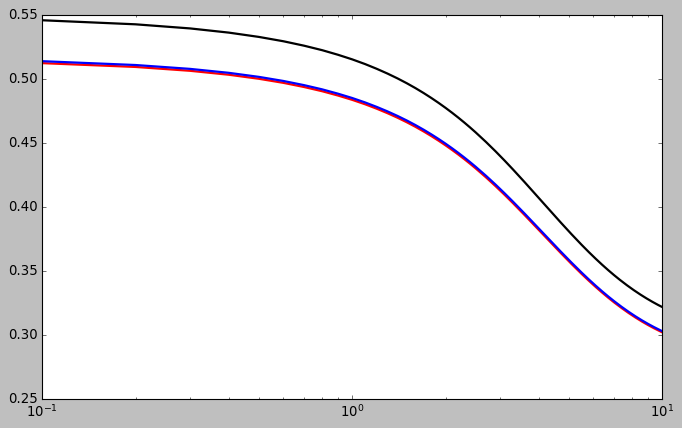

In [282]:
plt.figure(figsize=(10,6))
plt.xscale('log')
#plt.ylim(0.2,0.6)

plt.xlim(0.1,10)

plt.plot(frame_predicted_total_signal.energy_nu, np.mean(p_msw,axis=0), lw=2,ls='-',color='k')
plt.plot(frame_predicted_total_signal.energy_nu, np.mean(p_ee,axis=0), lw=2,ls='-',color='r')
plt.plot(frame_predicted_total_signal.energy_nu, np.mean(p_ee_exact,axis=0),lw=2,ls='-',color='b')


#plt.plot(frame_predicted_total_signal.energy_nu, np.min(p_ee,axis=0),lw=2,ls='-')



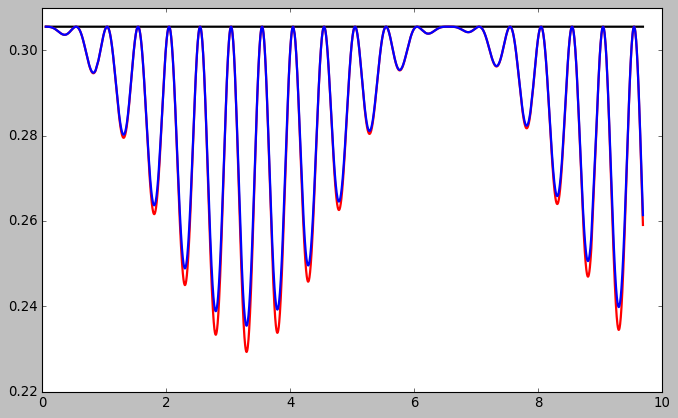

In [284]:
plt.figure(figsize=(10,6))
# plt.xscale('log')
# plt.ylim(0.2,0.6)
# plt.xlim(0.1,10)

plt.plot(t[:,1]/365.25,p_msw[:,-1],lw=2,ls='-',color='k')
plt.plot(t[:,1]/365.25,p_ee[:,-1],lw=2,ls='-',color='r')
plt.plot(t[:,1]/365.25,p_ee_exact[:,-1],lw=2,ls='-',color='b')

In [ ]:
# param ={'SinT12'  : 0.308 ,
#         'T13'  : 8.57, 
#         'mu1'  : 0.,
#         'mu2'  : 0.005, 
#         'mu3'  : 0.  ,
#         'mdm'  : 5e-2 , 
#         'alpha': 0.  ,
#         'eps' : 0.5  ,
#         'alpha_eps' : 0.  ,
#         'M12'  : 6.9e-5 }

# enu = np.logspace(-1,1,100)
# eta = np.array([3*np.pi/4])
# depth = 0

# frame_predicted_total_signal  = FrameWork(threshold=4.5,
#                                         efficiency_correction=True,
#                                         resolution_correction=False,
#                                     )

# _, theta, distance, days= frame_predicted_total_signal._variable_maker()

# #survival_probablity_msw = MSW(param, enu, eta, depth)
# survival_probablity_uldm, _ = ULDM(param, enu, eta, theta, distance, days, depth)

# plt.figure(figsize=(10,6))
# plt.xscale('log')
# plt.ylim(0.2,0.6)
# #plt.plot(enu, survival_probablity_msw[0], lw=2, color='k')
# plt.plot(enu, np.mean(survival_probablity_uldm[:,0,:],axis=0), lw=2, color='r')



# param ={'SinT12'  : 0.308 ,
#         'T13'  : 8.57, 
#         'mu1'  : 0.,
#         'mu2'  : 0.005, 
#         'mu3'  : 0.  ,
#         'mdm'  : 5e-2 , 
#         'alpha': 45.  ,
#         'eps' : 0.5  ,
#         'alpha_eps' : 0.  ,
#         'M12'  : 6.9e-5 }

# survival_probablity_uldm, _ = ULDM(param, enu, eta, theta, distance, days, depth)

# plt.plot(enu, np.mean(survival_probablity_uldm[:,0,:],axis=0), lw=2, color='g')

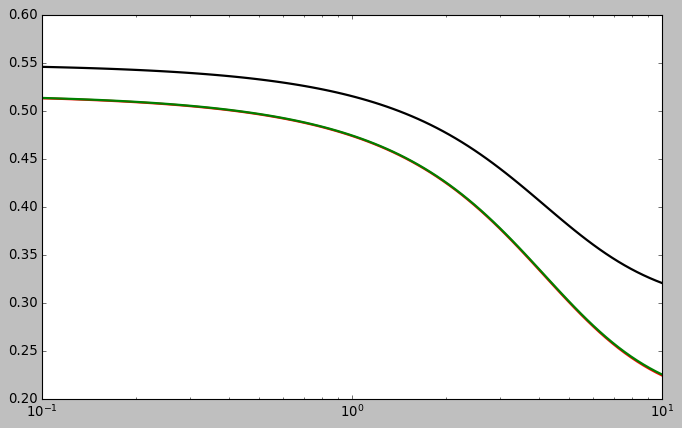

In [ ]:
# param ={'SinT12'  : 0.308 ,
#         'T13'  : 8.57, 
#         'mu1'  : 0.,
#         'mu2'  : 5., 
#         'mu3'  : 0.  ,
#         'mdm'  : 1e-1 , 
#         'alpha': 0  ,
#         'eps' : 0.  ,
#         'alpha_eps' : 0.  ,
#         'M12'  : 6.9e-5 }

# enu = np.logspace(-1,1,100)
# eta = np.array([3*np.pi/4])
# depth = 0

# frame_predicted_total_signal  = FrameWork(threshold=4.5,
#                                         efficiency_correction=True,
#                                         resolution_correction=False,
#                                         first_day='2015,1,1',
#                                         last_day='2016,1,1'
#                                     )

# _, theta, distance, days= frame_predicted_total_signal._variable_maker()

# survival_probablity_msw = MSW(param, enu, eta, depth)
# survival_probablity_uldm, _ = ULDM(param, enu, eta, theta, distance, days, depth)

# plt.figure(figsize=(10,6))
# plt.xscale('log')
# plt.ylim(0.2,0.6)
# plt.plot(enu, survival_probablity_msw[0], lw=2, color='k')
# plt.plot(enu, np.mean(survival_probablity_uldm[:,0,:],axis=0), lw=2, color='r')



# param ={'SinT12'  : 0.308 ,
#         'T13'  : 8.57, 
#         'mu1'  : 0.,
#         'mu2'  : 5., 
#         'mu3'  : 0.  ,
#         'mdm'  : 1e-1 , 
#         'alpha': 45  ,
#         'eps' : 0.  ,
#         'alpha_eps' : 0.  ,
#         'M12'  : 6.9e-5 }

# survival_probablity_uldm, _ = ULDM(param, enu, eta, theta, distance, days, depth)

# plt.plot(enu, np.mean(survival_probablity_uldm[:,0,:],axis=0), lw=2, color='g')

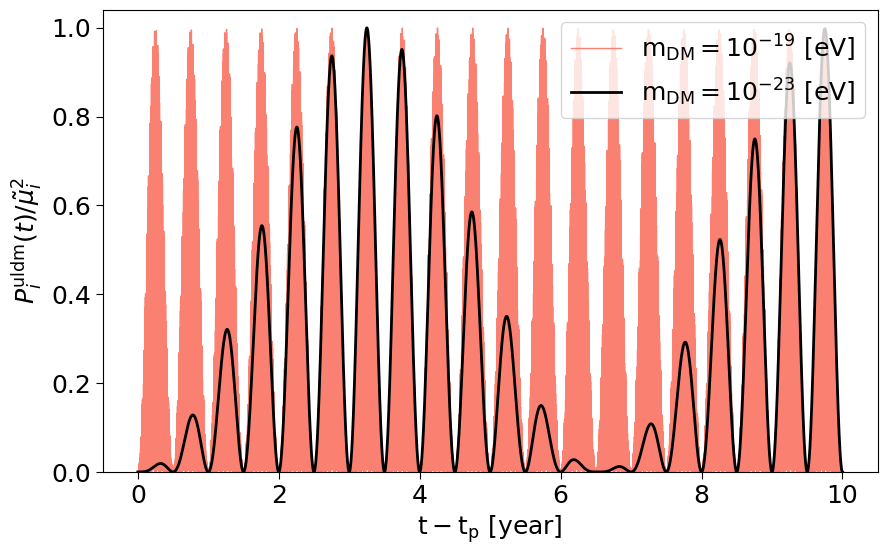

In [ ]:
days = np.arange(0,10,0.001)

plt.rcParams.update({'font.size': 18})
plt.rcParams['axes.formatter.useoffset'] = False

fig  = plt.figure(figsize=(10,6))
fig.subplots_adjust(hspace=0.2)
fig.subplots_adjust(wspace=0.1)

ax1 = fig.add_subplot(111)

ax1.set_ylim(0.,1.04)
#ax1.set_xlim(-0.02,1.02)
ax1.tick_params(axis='both', which='minor', length=4)
ax1.tick_params(axis='both', which='major', length=5)
#ax1.set_xlabel(r'$E_\nu \ \rm [MeV]$',fontsize=18)
ax1.set_ylabel(r'$ P_i^{\text{uldm}}(t)/ \tilde{\mu}_i^2 $',fontsize=18)
ax1.set_xlabel(r'${\rm t-t_p} \ \rm [year]$',fontsize=18)
#ax1.xaxis.set_major_formatter(plt.NullFormatter())

ax1.plot(days, PULDM(days, 1e-19, 0, 1, 1, 0), lw=1, color='salmon', label=r'$\rm m_{DM} = 10^{-19} \ [eV]$')
ax1.plot(days, PULDM(days, 1e-23, 0, 1, 1, 0), lw=2, color='k', label=r'$\rm m_{DM} = 10^{-23} \ [eV]$')
#ax1.plot(days, PULDM(days, 1e-23, 0, 1, 1, 0),ls='-', lw=2, color='g')



plt.legend(loc='upper right')

# param['mdm'] = 1e-2
# param['mu2'] = 1e-7

# param['alpha'] = 45
# mass_var = 1e9 * (RHO_DM2/param['mdm']) * (np.cos(param['mdm'] * day_list + np.radians(param['alpha'])) 
#                                     - np.cos(param['mdm'] * (day_list + (1e-2/6.6) * distance * ASTRO_UNIT/LIGHT_SPEED) + np.radians(param['alpha'])))
# uldm_term2 = np.cos(param['mu2'] * polar_vec * mass_var)**2 / distance**2
# ax1.plot(days,uldm_term2, lw=2, color='b')

# param['alpha'] = 90
# mass_var = 1e9 * (RHO_DM2/param['mdm']) * (np.cos(param['mdm'] * day_list + np.radians(param['alpha'])) 
#                                     - np.cos(param['mdm'] * (day_list + (1e-2/6.6) * distance * ASTRO_UNIT/LIGHT_SPEED) + np.radians(param['alpha'])))
# uldm_term2 = np.cos(param['mu2'] * polar_vec * mass_var)**2 / distance**2
# ax1.plot(days, uldm_term2, lw=2, color='r')

# param['alpha'] = 135
# mass_var = 1e9 * (RHO_DM2/param['mdm']) * (np.cos(param['mdm'] * day_list + np.radians(param['alpha'])) 
#                                     - np.cos(param['mdm'] * (day_list + (1e-2/6.6) * distance * ASTRO_UNIT/LIGHT_SPEED) + np.radians(param['alpha'])))
# uldm_term2 = np.cos(param['mu2'] * polar_vec * mass_var)**2 / distance**2
# ax1.plot(days, uldm_term2, lw=2, color='g')
# ax1.text(0.0, 1.06, r'$\rm \mu = 10^{-7} \ [GeV^{-1}], $', fontsize=16)
# ax1.text(0.55, 1.06, r'$\rm m_{dm} = 10^{-22} \ [eV] $', fontsize=16)


# ax2 = fig.add_subplot(222)
# ax2.set_ylim(0.76,1.04)
# ax2.set_xlim(-0.02,1.02)
# ax2.tick_params(axis='both', which='minor', length=4)
# ax2.tick_params(axis='both', which='major', length=5)
# #ax1.set_xlabel(r'$E_\nu \ \rm [MeV]$',fontsize=18)
# #ax2.set_ylabel(r'$ \bar{P}^{B8}_{ee} $',fontsize=22)
# ax2.yaxis.set_major_formatter(plt.NullFormatter())
# ax2.xaxis.set_major_formatter(plt.NullFormatter())

# ax2.plot(days, 1 / distance**2, lw=2, color='k')
# param['mdm'] = 1e0
# param['mu2'] = 1e-7

# param['alpha'] = 45
# mass_var = 1e9 * (RHO_DM2/param['mdm']) * (np.cos(param['mdm'] * day_list + np.radians(param['alpha'])) 
#                                     - np.cos(param['mdm'] * (day_list + (1e-2/6.6) * distance * ASTRO_UNIT/LIGHT_SPEED) + np.radians(param['alpha'])))
# uldm_term2 = np.cos(param['mu2'] * polar_vec * mass_var)**2 / distance**2
# ax2.plot(days, uldm_term2, lw=2, color='b')

# param['alpha'] = 90
# mass_var = 1e9 * (RHO_DM2/param['mdm']) * (np.cos(param['mdm'] * day_list + np.radians(param['alpha'])) 
#                                     - np.cos(param['mdm'] * (day_list + (1e-2/6.6) * distance * ASTRO_UNIT/LIGHT_SPEED) + np.radians(param['alpha'])))
# uldm_term2 = np.cos(param['mu2'] * polar_vec * mass_var)**2 / distance**2
# ax2.plot(days, uldm_term2, lw=2, color='r')

# param['alpha'] = 135
# mass_var = 1e9 * (RHO_DM2/param['mdm']) * (np.cos(param['mdm'] * day_list + np.radians(param['alpha'])) 
#                                     - np.cos(param['mdm'] * (day_list + (1e-2/6.6) * distance * ASTRO_UNIT/LIGHT_SPEED) + np.radians(param['alpha'])))
# uldm_term2 = np.cos(param['mu2'] * polar_vec * mass_var)**2 / distance**2
# ax2.plot(days, uldm_term2, lw=2, color='g')
# ax2.text(0.0, 1.06, r'$\rm \mu = 10^{-7} \ [GeV^{-1}], $', fontsize=16)
# ax2.text(0.55, 1.06, r'$\rm m_{dm} = 10^{-21} \ [eV] $', fontsize=16)

# ax3 = fig.add_subplot(223)

# ax3.set_ylim(0.76,1.04)
# ax3.set_xlim(-0.02,1.02)
# ax3.tick_params(axis='both', which='minor', length=4)
# ax3.tick_params(axis='both', which='major', length=5)
# ax3.set_xlabel(r'${\rm time} \ \rm [year]$',fontsize=18)
# ax3.set_ylabel(r'$ P_{ee}(t,E_{\nu})/ P_{ee}(E_{\nu}) $',fontsize=18)
# #ax1.xaxis.set_major_formatter(plt.NullFormatter())

# ax3.plot(days, 1 / distance**2, lw=2, color='k', label=r'$ \rm MSW $')

# param['mdm'] = 1e1
# param['mu2'] = 1e-7

# param['alpha'] = 45
# mass_var = 1e9 * (RHO_DM2/param['mdm']) * (np.cos(param['mdm'] * day_list + np.radians(param['alpha'])) 
#                                     - np.cos(param['mdm'] * (day_list + (1e-2/6.6) * distance * ASTRO_UNIT/LIGHT_SPEED) + np.radians(param['alpha'])))
# uldm_term2 = np.cos(param['mu2'] * polar_vec * mass_var)**2 / distance**2
# ax3.plot(days,uldm_term2, lw=2, color='b', label=r'$ \alpha = 45 $')

# param['alpha'] = 90
# mass_var = 1e9 * (RHO_DM2/param['mdm']) * (np.cos(param['mdm'] * day_list + np.radians(param['alpha'])) 
#                                     - np.cos(param['mdm'] * (day_list + (1e-2/6.6) * distance * ASTRO_UNIT/LIGHT_SPEED) + np.radians(param['alpha'])))
# uldm_term2 = np.cos(param['mu2'] * polar_vec * mass_var)**2 / distance**2
# ax3.plot(days, uldm_term2, lw=2, color='r', label=r'$ \alpha = 90 $')

# param['alpha'] = 135
# mass_var = 1e9 * (RHO_DM2/param['mdm']) * (np.cos(param['mdm'] * day_list + np.radians(param['alpha'])) 
#                                     - np.cos(param['mdm'] * (day_list + (1e-2/6.6) * distance * ASTRO_UNIT/LIGHT_SPEED) + np.radians(param['alpha'])))
# uldm_term2 = np.cos(param['mu2'] * polar_vec * mass_var)**2 / distance**2
# ax3.plot(days, uldm_term2, lw=2, color='g', label=r'$ \alpha = 135 $')
# ax3.text(0.0, 1.06, r'$\rm \mu = 10^{-7} \ [GeV^{-1}], $', fontsize=16)
# ax3.text(0.55, 1.06, r'$\rm m_{dm} = 10^{-20} \ [eV] $', fontsize=16)
# plt.legend(loc='lower left', fontsize=16)

# ax4 = fig.add_subplot(224)
# ax4.set_ylim(0.76,1.04)
# ax4.set_xlim(-0.02,1.02)
# ax4.tick_params(axis='both', which='minor', length=4)
# ax4.tick_params(axis='both', which='major', length=5)
# ax4.set_xlabel(r'${\rm time} \ \rm [year]$',fontsize=18)
# #ax2.set_ylabel(r'$ \bar{P}^{B8}_{ee} $',fontsize=22)
# ax4.yaxis.set_major_formatter(plt.NullFormatter())

# ax4.plot(days, 1 / distance**2, lw=2, color='k')
# param['mdm'] = 1e4
# param['mu2'] = 1e-7

# param['alpha'] = 45
# mass_var = 1e9 * (RHO_DM2/param['mdm']) * (np.cos(param['mdm'] * day_list + np.radians(param['alpha'])) 
#                                     - np.cos(param['mdm'] * (day_list + (1e-2/6.6) * distance * ASTRO_UNIT/LIGHT_SPEED) + np.radians(param['alpha'])))
# uldm_term2 = np.cos(param['mu2'] * polar_vec * mass_var)**2 / distance**2
# ax4.plot(days, uldm_term2, lw=2, color='b')

# param['alpha'] = 90
# mass_var = 1e9 * (RHO_DM2/param['mdm']) * (np.cos(param['mdm'] * day_list + np.radians(param['alpha'])) 
#                                     - np.cos(param['mdm'] * (day_list + (1e-2/6.6) * distance * ASTRO_UNIT/LIGHT_SPEED) + np.radians(param['alpha'])))
# uldm_term2 = np.cos(param['mu2'] * polar_vec * mass_var)**2 / distance**2
# ax4.plot(days, uldm_term2, lw=2, color='r')

# param['alpha'] = 135
# mass_var = 1e9 * (RHO_DM2/param['mdm']) * (np.cos(param['mdm'] * day_list + np.radians(param['alpha'])) 
#                                     - np.cos(param['mdm'] * (day_list + (1e-2/6.6) * distance * ASTRO_UNIT/LIGHT_SPEED) + np.radians(param['alpha'])))
# uldm_term2 = np.cos(param['mu2'] * polar_vec * mass_var)**2 / distance**2
# #ax4.plot(days, uldm_term2, lw=2, color='g')
# ax4.text(0.0, 1.06, r'$\rm \mu = 10^{-7} \ [GeV^{-1}], $', fontsize=16)
# ax4.text(0.55, 1.06, r'$\rm m_{dm} = 10^{-17} \ [eV] $', fontsize=16)

plt.savefig('./PULDM.pdf', bbox_inches='tight')

0.0
0.5


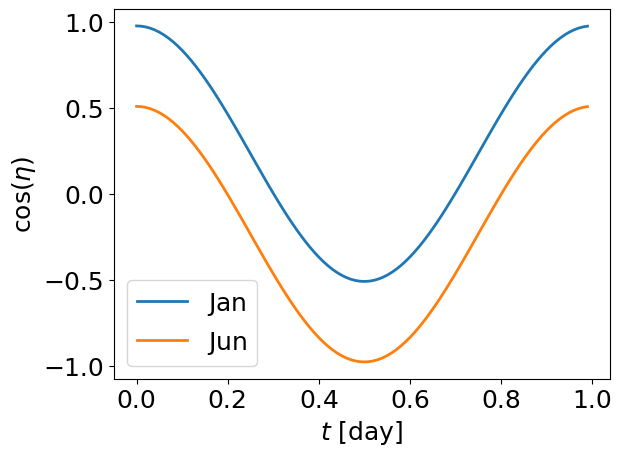

In [118]:
sin_deltas = - np.sin(0.4091) * np.cos(2 * np.pi * np.arange(0,1,0.5))
cos_deltas = np.sqrt(1 - sin_deltas**2)

cos_lam = np.cos(np.radians(36))
sin_lam = np.sin(np.radians(36))

labels= [r'$\rm Jan$', r'$\rm Jun$', r'$\rm s$']

for i in range(len(sin_deltas)):
    plt.plot(np.arange(0,1,0.01), cos_lam * cos_deltas[i] * np.cos(2 * np.pi * np.arange(0,1,0.01)) - sin_lam * sin_deltas[i], lw=2, label=labels[i])
    print(np.arange(0,1,0.5)[i])


plt.ylabel(r'$\cos(\eta)$')
plt.xlabel(r'$t  \rm \ [day]$')

plt.legend()


#plt.savefig('./matter_exposure.pdf', bbox_inches='tight')
#plt.plot(np.arange(0,1,0.001), np.sqrt(1 - sin_deltas**2))
#plt.plot(np.arange(0,1,0.001), - sin_deltas)



Text(0.55, 1.06, '$\\rm m_{dm} = 10^{-17} \\ [eV] $')

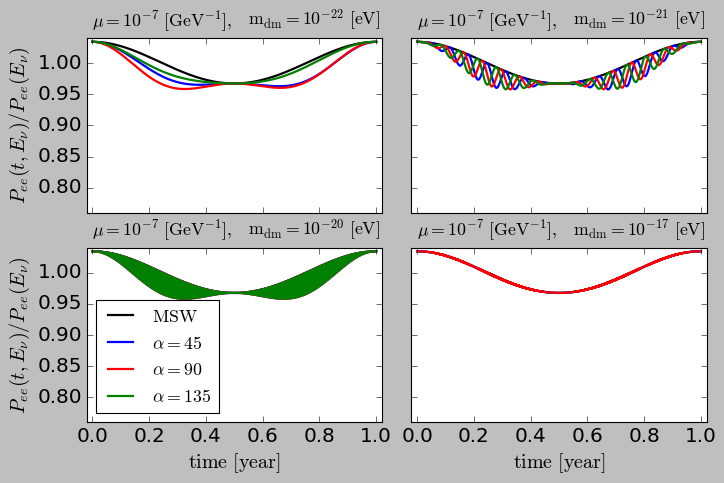

In [23]:
LIGHT_SPEED = 2.998 # 1e8 m/s
RHO_DM2  = np.sqrt(2 * 0.4 * 7.65) #e-21 GeV^2
ASTRO_UNIT    =  1.496 #1e11 m

frame_predicted_total_signal  = FrameWork(threshold=4.5,
                                        efficiency_correction=True,
                                        resolution_correction=False,
                                        first_day='2015,1,1',
                                        last_day='2016,1,1'
                                    )

_, theta, distance, days= frame_predicted_total_signal._variable_maker(dtheta=0.0005)
day_list  = days * 3.6525 * 2.4 * 6. * 6. / 6.6 # in 1e21 eV^-1
param['epsx'] = np.cos(0)
param['epsy'] = np.sin(0)
polar_vec = np.sqrt((1 - ( param['epsx'] * np.cos(theta) + param['epsy'] * np.sin(theta))**2))
#10^-24 ev order of 10 years, 
#10^-20 ev order of day

plt.rcParams.update({'font.size': 18})
plt.rcParams['axes.formatter.useoffset'] = False

fig  = plt.figure(figsize=(10,6))
fig.subplots_adjust(hspace=0.2)
fig.subplots_adjust(wspace=0.1)

ax1 = fig.add_subplot(221)

ax1.set_ylim(0.76,1.04)
ax1.set_xlim(-0.02,1.02)
ax1.tick_params(axis='both', which='minor', length=4)
ax1.tick_params(axis='both', which='major', length=5)
#ax1.set_xlabel(r'$E_\nu \ \rm [MeV]$',fontsize=18)
ax1.set_ylabel(r'$ P_{ee}(t,E_{\nu})/ P_{ee}(E_{\nu}) $',fontsize=18)
ax1.xaxis.set_major_formatter(plt.NullFormatter())

ax1.plot(days, 1 / distance**2, lw=2, color='k')

param['mdm'] = 1e-2
param['mu2'] = 1e-7

param['alpha'] = 45
mass_var = 1e9 * (RHO_DM2/param['mdm']) * (np.cos(param['mdm'] * day_list + np.radians(param['alpha'])) 
                                    - np.cos(param['mdm'] * (day_list + (1e-2/6.6) * distance * ASTRO_UNIT/LIGHT_SPEED) + np.radians(param['alpha'])))
uldm_term2 = np.cos(param['mu2'] * polar_vec * mass_var)**2 / distance**2
ax1.plot(days,uldm_term2, lw=2, color='b')

param['alpha'] = 90
mass_var = 1e9 * (RHO_DM2/param['mdm']) * (np.cos(param['mdm'] * day_list + np.radians(param['alpha'])) 
                                    - np.cos(param['mdm'] * (day_list + (1e-2/6.6) * distance * ASTRO_UNIT/LIGHT_SPEED) + np.radians(param['alpha'])))
uldm_term2 = np.cos(param['mu2'] * polar_vec * mass_var)**2 / distance**2
ax1.plot(days, uldm_term2, lw=2, color='r')

param['alpha'] = 135
mass_var = 1e9 * (RHO_DM2/param['mdm']) * (np.cos(param['mdm'] * day_list + np.radians(param['alpha'])) 
                                    - np.cos(param['mdm'] * (day_list + (1e-2/6.6) * distance * ASTRO_UNIT/LIGHT_SPEED) + np.radians(param['alpha'])))
uldm_term2 = np.cos(param['mu2'] * polar_vec * mass_var)**2 / distance**2
ax1.plot(days, uldm_term2, lw=2, color='g')
ax1.text(0.0, 1.06, r'$\rm \mu = 10^{-7} \ [GeV^{-1}], $', fontsize=16)
ax1.text(0.55, 1.06, r'$\rm m_{dm} = 10^{-22} \ [eV] $', fontsize=16)


ax2 = fig.add_subplot(222)
ax2.set_ylim(0.76,1.04)
ax2.set_xlim(-0.02,1.02)
ax2.tick_params(axis='both', which='minor', length=4)
ax2.tick_params(axis='both', which='major', length=5)
#ax1.set_xlabel(r'$E_\nu \ \rm [MeV]$',fontsize=18)
#ax2.set_ylabel(r'$ \bar{P}^{B8}_{ee} $',fontsize=22)
ax2.yaxis.set_major_formatter(plt.NullFormatter())
ax2.xaxis.set_major_formatter(plt.NullFormatter())

ax2.plot(days, 1 / distance**2, lw=2, color='k')
param['mdm'] = 1e0
param['mu2'] = 1e-7

param['alpha'] = 45
mass_var = 1e9 * (RHO_DM2/param['mdm']) * (np.cos(param['mdm'] * day_list + np.radians(param['alpha'])) 
                                    - np.cos(param['mdm'] * (day_list + (1e-2/6.6) * distance * ASTRO_UNIT/LIGHT_SPEED) + np.radians(param['alpha'])))
uldm_term2 = np.cos(param['mu2'] * polar_vec * mass_var)**2 / distance**2
ax2.plot(days, uldm_term2, lw=2, color='b')

param['alpha'] = 90
mass_var = 1e9 * (RHO_DM2/param['mdm']) * (np.cos(param['mdm'] * day_list + np.radians(param['alpha'])) 
                                    - np.cos(param['mdm'] * (day_list + (1e-2/6.6) * distance * ASTRO_UNIT/LIGHT_SPEED) + np.radians(param['alpha'])))
uldm_term2 = np.cos(param['mu2'] * polar_vec * mass_var)**2 / distance**2
ax2.plot(days, uldm_term2, lw=2, color='r')

param['alpha'] = 135
mass_var = 1e9 * (RHO_DM2/param['mdm']) * (np.cos(param['mdm'] * day_list + np.radians(param['alpha'])) 
                                    - np.cos(param['mdm'] * (day_list + (1e-2/6.6) * distance * ASTRO_UNIT/LIGHT_SPEED) + np.radians(param['alpha'])))
uldm_term2 = np.cos(param['mu2'] * polar_vec * mass_var)**2 / distance**2
ax2.plot(days, uldm_term2, lw=2, color='g')
ax2.text(0.0, 1.06, r'$\rm \mu = 10^{-7} \ [GeV^{-1}], $', fontsize=16)
ax2.text(0.55, 1.06, r'$\rm m_{dm} = 10^{-21} \ [eV] $', fontsize=16)

ax3 = fig.add_subplot(223)

ax3.set_ylim(0.76,1.04)
ax3.set_xlim(-0.02,1.02)
ax3.tick_params(axis='both', which='minor', length=4)
ax3.tick_params(axis='both', which='major', length=5)
ax3.set_xlabel(r'${\rm time} \ \rm [year]$',fontsize=18)
ax3.set_ylabel(r'$ P_{ee}(t,E_{\nu})/ P_{ee}(E_{\nu}) $',fontsize=18)
#ax1.xaxis.set_major_formatter(plt.NullFormatter())

ax3.plot(days, 1 / distance**2, lw=2, color='k', label=r'$ \rm MSW $')

param['mdm'] = 1e1
param['mu2'] = 1e-7

param['alpha'] = 45
mass_var = 1e9 * (RHO_DM2/param['mdm']) * (np.cos(param['mdm'] * day_list + np.radians(param['alpha'])) 
                                    - np.cos(param['mdm'] * (day_list + (1e-2/6.6) * distance * ASTRO_UNIT/LIGHT_SPEED) + np.radians(param['alpha'])))
uldm_term2 = np.cos(param['mu2'] * polar_vec * mass_var)**2 / distance**2
ax3.plot(days,uldm_term2, lw=2, color='b', label=r'$ \alpha = 45 $')

param['alpha'] = 90
mass_var = 1e9 * (RHO_DM2/param['mdm']) * (np.cos(param['mdm'] * day_list + np.radians(param['alpha'])) 
                                    - np.cos(param['mdm'] * (day_list + (1e-2/6.6) * distance * ASTRO_UNIT/LIGHT_SPEED) + np.radians(param['alpha'])))
uldm_term2 = np.cos(param['mu2'] * polar_vec * mass_var)**2 / distance**2
ax3.plot(days, uldm_term2, lw=2, color='r', label=r'$ \alpha = 90 $')

param['alpha'] = 135
mass_var = 1e9 * (RHO_DM2/param['mdm']) * (np.cos(param['mdm'] * day_list + np.radians(param['alpha'])) 
                                    - np.cos(param['mdm'] * (day_list + (1e-2/6.6) * distance * ASTRO_UNIT/LIGHT_SPEED) + np.radians(param['alpha'])))
uldm_term2 = np.cos(param['mu2'] * polar_vec * mass_var)**2 / distance**2
ax3.plot(days, uldm_term2, lw=2, color='g', label=r'$ \alpha = 135 $')
ax3.text(0.0, 1.06, r'$\rm \mu = 10^{-7} \ [GeV^{-1}], $', fontsize=16)
ax3.text(0.55, 1.06, r'$\rm m_{dm} = 10^{-20} \ [eV] $', fontsize=16)
plt.legend(loc='lower left', fontsize=16)

ax4 = fig.add_subplot(224)
ax4.set_ylim(0.76,1.04)
ax4.set_xlim(-0.02,1.02)
ax4.tick_params(axis='both', which='minor', length=4)
ax4.tick_params(axis='both', which='major', length=5)
ax4.set_xlabel(r'${\rm time} \ \rm [year]$',fontsize=18)
#ax2.set_ylabel(r'$ \bar{P}^{B8}_{ee} $',fontsize=22)
ax4.yaxis.set_major_formatter(plt.NullFormatter())

ax4.plot(days, 1 / distance**2, lw=2, color='k')
param['mdm'] = 1e4
param['mu2'] = 1e-7

param['alpha'] = 45
mass_var = 1e9 * (RHO_DM2/param['mdm']) * (np.cos(param['mdm'] * day_list + np.radians(param['alpha'])) 
                                    - np.cos(param['mdm'] * (day_list + (1e-2/6.6) * distance * ASTRO_UNIT/LIGHT_SPEED) + np.radians(param['alpha'])))
uldm_term2 = np.cos(param['mu2'] * polar_vec * mass_var)**2 / distance**2
ax4.plot(days, uldm_term2, lw=2, color='b')

param['alpha'] = 90
mass_var = 1e9 * (RHO_DM2/param['mdm']) * (np.cos(param['mdm'] * day_list + np.radians(param['alpha'])) 
                                    - np.cos(param['mdm'] * (day_list + (1e-2/6.6) * distance * ASTRO_UNIT/LIGHT_SPEED) + np.radians(param['alpha'])))
uldm_term2 = np.cos(param['mu2'] * polar_vec * mass_var)**2 / distance**2
ax4.plot(days, uldm_term2, lw=2, color='r')

param['alpha'] = 135
mass_var = 1e9 * (RHO_DM2/param['mdm']) * (np.cos(param['mdm'] * day_list + np.radians(param['alpha'])) 
                                    - np.cos(param['mdm'] * (day_list + (1e-2/6.6) * distance * ASTRO_UNIT/LIGHT_SPEED) + np.radians(param['alpha'])))
uldm_term2 = np.cos(param['mu2'] * polar_vec * mass_var)**2 / distance**2
#ax4.plot(days, uldm_term2, lw=2, color='g')
ax4.text(0.0, 1.06, r'$\rm \mu = 10^{-7} \ [GeV^{-1}], $', fontsize=16)
ax4.text(0.55, 1.06, r'$\rm m_{dm} = 10^{-17} \ [eV] $', fontsize=16)

#plt.savefig('./mu_mdm_01.pdf', bbox_inches='tight')